# EDA

## Librerias

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos

In [55]:
homicidios_archivo = pd.ExcelFile('../Archivos/homicidios.xlsx')
homicidios_libros = {}
for nombre in homicidios_archivo.sheet_names:
    homicidios_libros[nombre] = homicidios_archivo.parse(nombre)
homicidios_hechos = homicidios_libros['HECHOS']
homicidios_victimas = homicidios_libros['VICTIMAS']

## Homicidios-Hechos

### Tipo de datos

In [56]:
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [57]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Vemos que contamos con 14 strings, 1 int, 1 float, y un datetime.

### Valores duplicados

In [58]:
homicidios_hechos[homicidios_hechos.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


No existen valores duplicados 

### Valores nulos

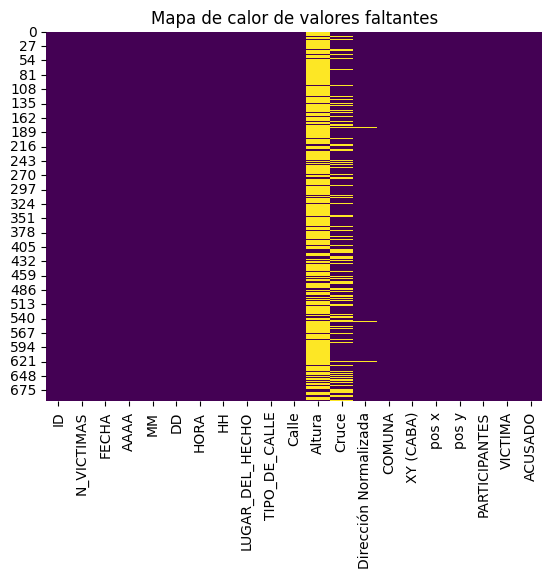

In [59]:
sns.heatmap(homicidios_hechos.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Hay valores nulos presentes en los datos de 'Altura' 'Cruce' y 'Direccion normalizada', podemos ignorar estos nulos ya que son datos que no seran utilizados en el Dashboard.

### Analisis descriptivo

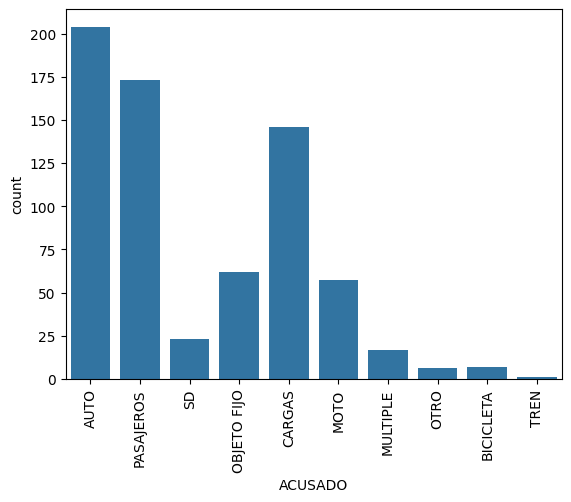

In [60]:
sns.countplot(x='ACUSADO',data=homicidios_hechos)
plt.xticks(rotation=90)
plt.show()

Apreciamos que el principal acusado son los autos con mas de 200 casos, seguido por los pasajeros y las cargas, el resto de acusados tienen un mucho menor numero de casos en comparacion.
Tambien se presenta una pequeña cantidad de casos que no poseen datos del vehiculo acusado.

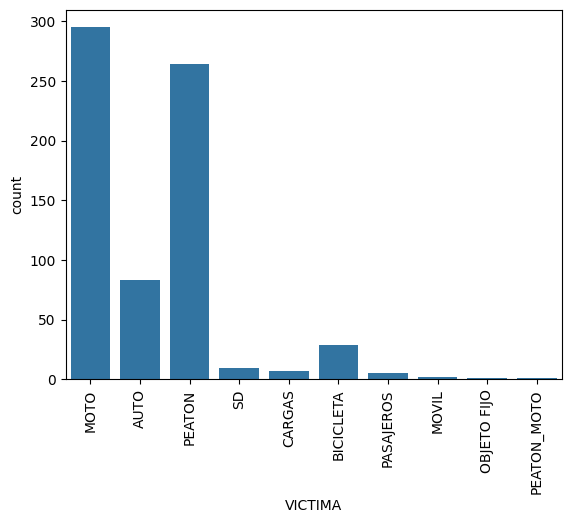

In [61]:
sns.countplot(x='VICTIMA',data=homicidios_hechos)
plt.xticks(rotation=90)
plt.show()

La cantidad de casos donde la victima son motociclistas son casi 300, de cerca estan los peatones con mas de 250, de esta manera completando entre los 2 alrededor del 80% del total de casos siendo notorio que son en la mayor parte de ocaciones los afectados.
Existe un porcentaje muy pequeño de victimas sin determinar.

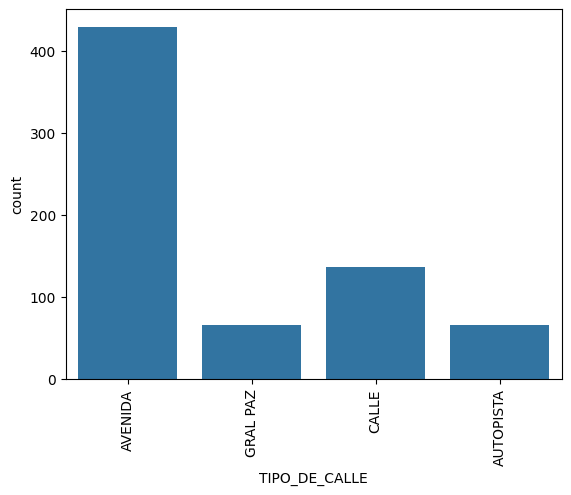

In [62]:
sns.countplot(x='TIPO_DE_CALLE',data=homicidios_hechos)
plt.xticks(rotation=90)
plt.show()

Mas de 400 accidentes fueron en avenidas siendo las calles con mas riesgo de accidentes con diferencia de las autopistas y otro tipo de calles 

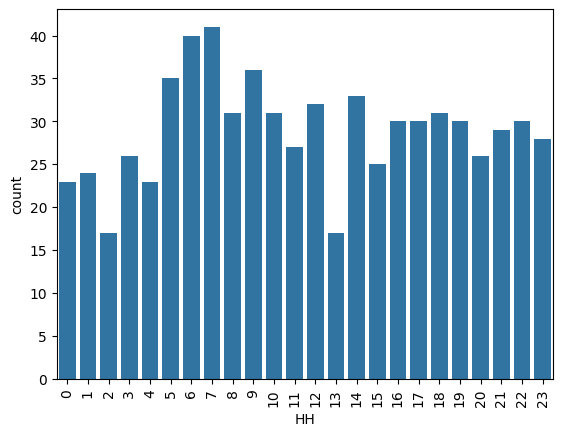

In [63]:
orden_horas = [str(i) for i in range(24)]
sns.countplot(x='HH',data=homicidios_hechos,order=orden_horas)
plt.xticks(rotation=90)
plt.show()

Los accidentes se destribuyen de manera parecida a lo largo de las horas con pequeños detalles como un pico de casos entre las 5 y 7 de la mañana y una baja de accidentes a las 2 de la mañana y 1 de la tarde.

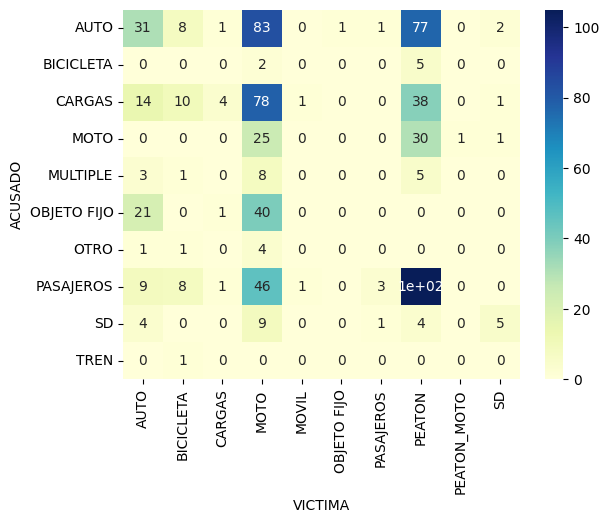

In [64]:
acusado_victima = pd.crosstab(homicidios_hechos['ACUSADO'], homicidios_hechos['VICTIMA'])
sns.heatmap(acusado_victima, annot=True, cmap="YlGnBu")
plt.show()

Los casos mas comunes de Acusado-Victima son Pasajeros-Peaton, Auto-Moto, Cargas-Moto y Auto-Peaton

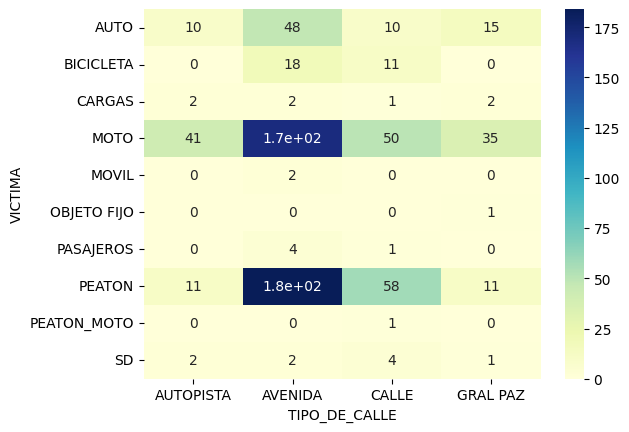

In [65]:
calle_victima = pd.crosstab(homicidios_hechos['VICTIMA'], homicidios_hechos['TIPO_DE_CALLE'])
sns.heatmap(calle_victima, annot=True, cmap="YlGnBu")
plt.show()

Las victimas mas comunes en las avenidas con una gran diferencia son los peatones y las motos 

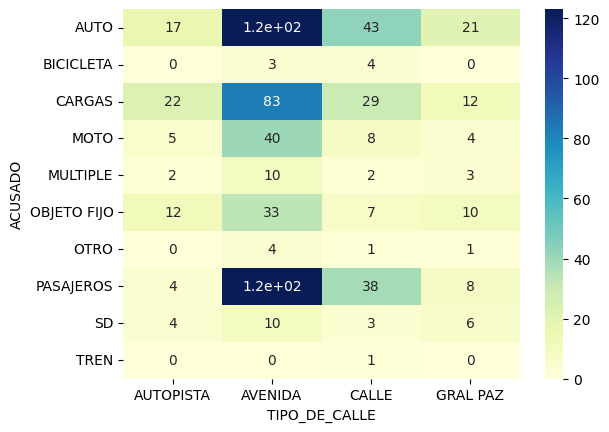

In [66]:
acusado_calle = pd.crosstab(homicidios_hechos['ACUSADO'], homicidios_hechos['TIPO_DE_CALLE'])
sns.heatmap(acusado_calle, annot=True, cmap="YlGnBu")
plt.show()

Los acusados que mas incidentes tuvieron en las avenidas son los autos y pasajeros

### Eliminar columnas no relevantes para el dashboard

In [67]:
homicidios_hechos.drop(columns=['LUGAR_DEL_HECHO','Calle','Altura','Cruce','Dirección Normalizada','XY (CABA)','PARTICIPANTES'],inplace=True)

### Exportar dataframe

In [68]:
homicidios_hechos.to_csv('../Archivos/hechos.csv',index=False)

## Homicidios-Victimas

### Tipo de datos

In [69]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [70]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Existe una columna de datetime, año, mes y dia como int y el resto string.

### Valores duplicados

In [71]:
homicidios_victimas[homicidios_victimas.duplicated()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


No existen valores duplicados

### Valores nulos

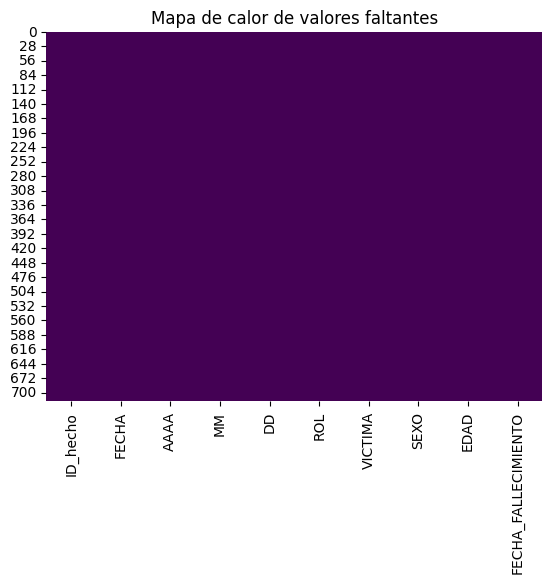

In [72]:
sns.heatmap(homicidios_victimas.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

No existen valores nulos 

### Analisis descriptivo

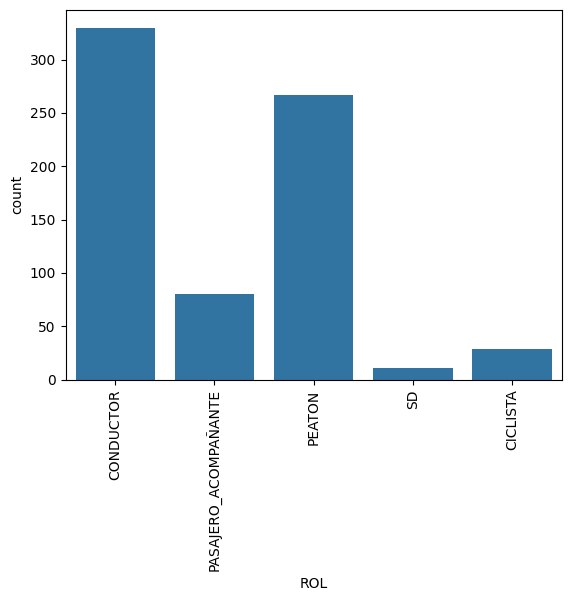

In [73]:
sns.countplot(x='ROL',data=homicidios_victimas)
plt.xticks(rotation=90)
plt.show()

Los roles mas comunes de las victimas son conductor y peaton, acompañantes ocupan el tercer lugar con menos de 100 casos

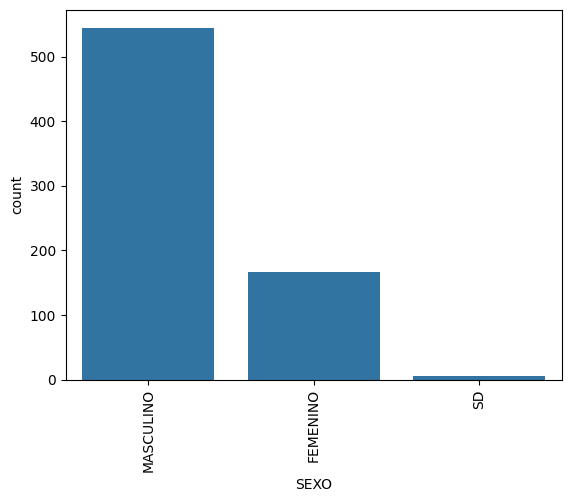

In [74]:
sns.countplot(x='SEXO',data=homicidios_victimas)
plt.xticks(rotation=90)
plt.show()

El genero masculino representa alrededor del 80% de los casos

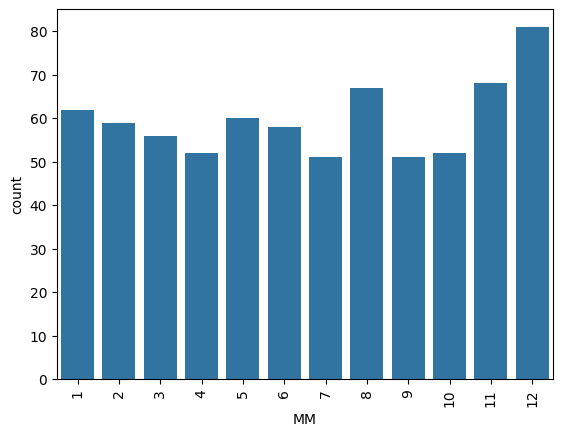

In [75]:
sns.countplot(x='MM',data=homicidios_victimas)
plt.xticks(rotation=90)
plt.show()

Los casos se reparten de manera similar en los 12 meses con una leve alza en diciembre 

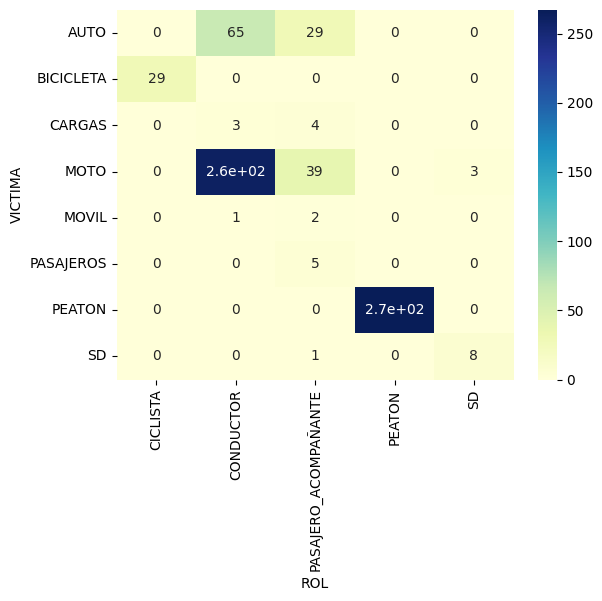

In [76]:
rol_victima = pd.crosstab(homicidios_victimas['VICTIMA'], homicidios_victimas['ROL'])
sns.heatmap(rol_victima, annot=True, cmap="YlGnBu")
plt.show()

Las victimas mas comunes son los conductores de motos, destacando que los acompañantes representan una cantidad mucho menor, y los peatones

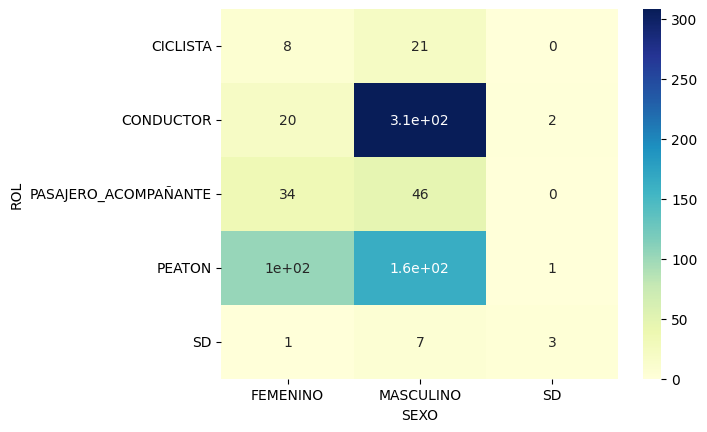

In [77]:
rol_sexo = pd.crosstab(homicidios_victimas['ROL'], homicidios_victimas['SEXO'])
sns.heatmap(rol_sexo, annot=True, cmap="YlGnBu")
plt.show()

Las victimas conductores son casi en su totalidad masculinos mientras los peatones se dividin en 60% masculinos y 40% femeninos.

### Eliminar columnas no relevantes para el dashboard

In [78]:
homicidios_victimas.drop(columns=['FECHA_FALLECIMIENTO','FECHA','AAAA','MM','DD'],inplace=True)

### Exportar dataframe

In [79]:
homicidios_victimas.to_csv('../Archivos/victimas.csv',index=False)